In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [6]:
data.data.shape

(569, 30)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [15]:
X_train_std.std()

np.float64(1.0)

In [17]:
N, D = X_train_std.shape
N, D

(381, 30)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='zeros', bias_initializer='zeros')
])

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [21]:
r = model.fit(
    X_train_std, y_train,
    validation_data = (X_test_std, y_test),
    epochs = 100,
    batch_size = 16
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8431 - loss: 0.6578 - val_accuracy: 0.9309 - val_loss: 0.5619
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9272 - loss: 0.5433 - val_accuracy: 0.9362 - val_loss: 0.4707
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.4702 - val_accuracy: 0.9415 - val_loss: 0.4066
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9379 - loss: 0.4094 - val_accuracy: 0.9468 - val_loss: 0.3591
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.3705 - val_accuracy: 0.9521 - val_loss: 0.3225
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9531 - loss: 0.3323 - val_accuracy: 0.9521 - val_loss: 0.2940
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9409 - loss: 0.3168 - val_accuracy: 0.9681 - val_loss: 0.2712
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9269 - loss: 0.3074 - val_accuracy: 0.9681 - 

In [30]:
r.history['accuracy'][0]

0.8923884630203247

In [32]:
model.evaluate(X_test_std, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9758 - loss: 0.0655 


[0.06777966767549515, 0.978723406791687]

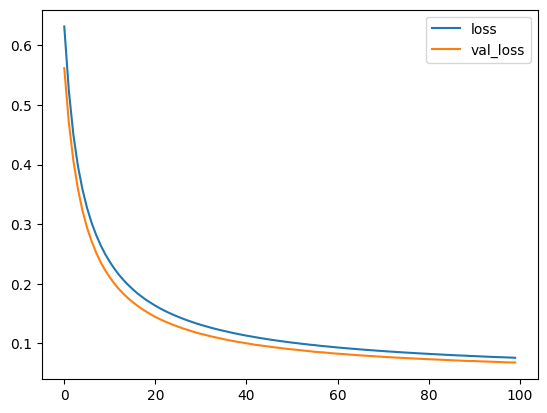

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show();